# Gradient Boost Classifier

In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.show()

In [20]:
df = pd.read_csv("AD_purchace.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
df.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [23]:
df["Gender"] = df["Gender"].map({"Female":0,"Male":1})

In [24]:
x = df.drop(columns = ["User ID","Purchased"])
y = df["Purchased"]

In [25]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier 

model=GradientBoostingClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
14,0,0
363,0,0
304,0,0
361,1,1


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
print("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.925


[[55  3]
 [ 3 19]]


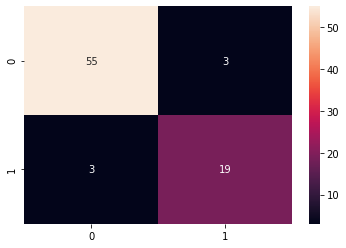

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot = True)
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.86      0.86      0.86        22

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



# Voting Classifier

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.show()

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
x = df.drop(columns = ["Outcome"])
y = df["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[('lr',LogisticRegression()),('knn',KNeighborsClassifier(n_neighbors=3)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB()),('rf',RandomForestClassifier(n_estimators=100))]

In [7]:
from sklearn.ensemble import VotingClassifier 

model = VotingClassifier(estimators = models, voting = 'hard')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [9]:
print("Accuracy is : ", accuracy_score(y_test, y_pred))

Accuracy is :  0.8051948051948052


[[97 10]
 [20 27]]


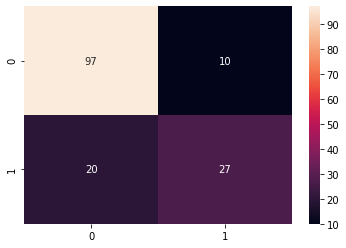

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot = True)
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



#### Voting Classifier on Loan Data Set

In [12]:
loan = pd.read_csv("loan_data_set.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
loan = loan.dropna()

In [15]:
loan["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [16]:
loan["Dependent"] = loan["Dependents"].replace("3+","3")

In [17]:
loan["Dependent"].unique()

array(['1', '0', '2', '3'], dtype=object)

In [18]:
loan = loan.drop(columns = ["Loan_ID", "Dependents"])
loan.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,2


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

loan[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]] = loan[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]].apply(le.fit_transform)

loan.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,1,2


In [20]:
x = loan.drop(columns = ["Loan_Status"])

y = loan["Loan_Status"]

In [21]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[('lr',LogisticRegression()),('knn',KNeighborsClassifier(n_neighbors=3)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB()),('rf',RandomForestClassifier(n_estimators=100))]

In [23]:
from sklearn.ensemble import VotingClassifier 

model = VotingClassifier(estimators = models, voting = 'hard')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Accuracy is :  0.7604166666666666
Confusion Matrix :  [[12 23]
 [ 0 61]]


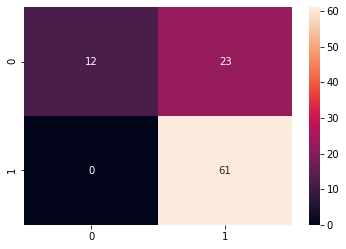

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        35
           1       0.73      1.00      0.84        61

    accuracy                           0.76        96
   macro avg       0.86      0.67      0.68        96
weighted avg       0.83      0.76      0.72        96



In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

print("Accuracy is : ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ", cm)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

### Parameter Tunning for Voting Classifier

# Stacked Classifier/Regressor

#### 1. Stacking Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [27]:
base_models = [('knn',KNeighborsClassifier(n_neighbors=5)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB()),('rf',RandomForestClassifier(n_estimators=100))]

final_model = LogisticRegression()

from sklearn.ensemble import StackingClassifier 

model = StackingClassifier(estimators = base_models, final_estimator = final_model)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Accuracy is :  0.78125
Confusion Matrix :  [[14 21]
 [ 0 61]]


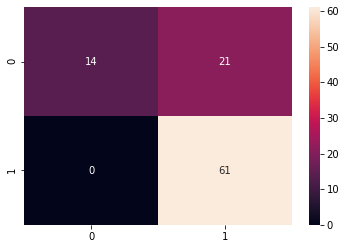

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        35
           1       0.74      1.00      0.85        61

    accuracy                           0.78        96
   macro avg       0.87      0.70      0.71        96
weighted avg       0.84      0.78      0.75        96



In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

print("Accuracy is : ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ", cm)

sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

#### 2. Stacking Regressors

In [31]:
df = pd.read_csv("housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [32]:
x = df.drop(columns = ["MEDV"])
#  
y = df["MEDV"]

In [33]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.linear_model import LinearRegression, ElasticNetCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

base_models = [("Elasticnet",ElasticNetCV()), ("gbr", GradientBoostingRegressor(n_estimators = 100)), ("svr", SVR())]
final_model = LinearRegression()

In [40]:
from sklearn.ensemble import StackingRegressor

model = StackingRegressor(estimators=base_models,final_estimator=final_model)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.8068067847343823
